In [5]:
# 定义一个二元二次函数
f(x,y) = x^2 + y^2

f (generic function with 1 method)

In [6]:
# x,y为两个Int整型
@code_warntype f(1,2)

Variables
  #self#::Core.Compiler.Const(f, false)
  x::Int64
  y::Int64

Body::Int64
1 ─ %1 = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %2 = (%1)()::Core.Compiler.Const(Val{2}(), false)
│   %3 = Base.literal_pow(Main.:^, x, %2)::Int64
│   %4 = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %5 = (%4)()::Core.Compiler.Const(Val{2}(), false)
│   %6 = Base.literal_pow(Main.:^, y, %5)::Int64
│   %7 = (%3 + %6)::Int64
└──      return %7


In [7]:
# x,y为两个浮点数（）
@code_warntype f(1.,2.)

Variables
  #self#::Core.Compiler.Const(f, false)
  x::Float64
  y::Float64

Body::Float64
1 ─ %1 = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %2 = (%1)()::Core.Compiler.Const(Val{2}(), false)
│   %3 = Base.literal_pow(Main.:^, x, %2)::Float64
│   %4 = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %5 = (%4)()::Core.Compiler.Const(Val{2}(), false)
│   %6 = Base.literal_pow(Main.:^, y, %5)::Float64
│   %7 = (%3 + %6)::Float64
└──      return %7


注意看上面两个代码的编译过程：Julia分别智能地调用了Int和Float的运算符！

In [8]:
# 定义和调用函数f时无需申明x,y的类型！
f(1,2.2)

5.840000000000001

In [10]:
function sinh(x)
    return  (ℯ.^x - ℯ.^(-x))/2
end

sinh (generic function with 1 method)

In [11]:
sinh(1)

1.1752011936438014

In [12]:
ℯ

ℯ = 2.7182818284590...

In [9]:
using Plots

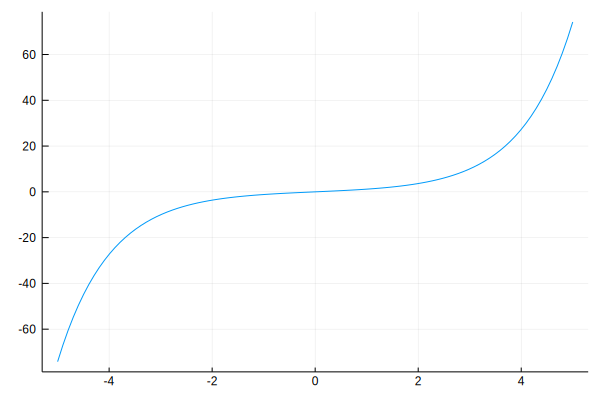

In [13]:
# 绘制函数图像；range()标明定义域范围
plot(range(-5,5,length = 100), sinh(range(-5,5,length = 100)), legend = :no)

In [14]:
function sinh(x)::Float64
    return  (ℯ.^x - ℯ.^(-x))/2
end
sinh(1)

1.1752011936438014

In [15]:
typeof(sinh(1))

Float64

In [16]:
# 定义一个组合类：三维空间点的坐标
struct Coordinate{T}
    x::T
    y::T
    z::T
end

In [17]:
# 创建一个组合类的对象
test_struct = Coordinate{Float64}(32, 64, 3.2)

Coordinate{Float64}(32.0, 64.0, 3.2)

In [18]:
# 输出创建对象的值
print("x = ",test_struct.x,"\n")
print("y = ",test_struct.y,"\n")
print("z = ",test_struct.z,"\n")

x = 32.0
y = 64.0
z = 3.2


In [19]:
# 再创建一个组合类的对象
test_struct2 = Coordinate{Int64}(1, 5, 2)

Coordinate{Int64}(1, 5, 2)

In [20]:
# 头文件！
include("FancyStructs.jl")

Main.FancyStructs

In [21]:
# 尝试一下新定义的加法
test_struct = FancyStructs.Coordinate{Float64}(32, 64, 3.2)
test_struct2 = FancyStructs.Coordinate{Int64}(1, 5, 2)
FancyStructs.CoordinateAdd(test_struct,test_struct2)

(32.0,64.0,3.2) + (1,5,2) = (33.0,69.0,5.2)
